<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/M200674CA_Kmeans_Assg5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMEANS**

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import metrics as sm
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Text(0, 0.5, 'Sepal length')

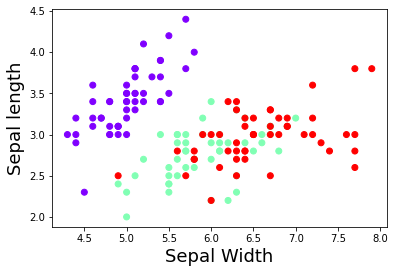

In [ ]:
plt.scatter(x=iris_df['SepalLengthCm'], y=iris_df['SepalWidthCm'] ,c=iris_df['Species'], cmap='rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

** Using the elbow method to estimate the value k**


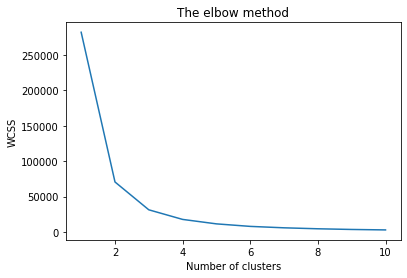

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] #the sum of squared distance between each point and the centroid in a cluster
#calculate the Sum of Squared Error (SSE). SSE is calculated as the mean distance between data points and their cluster centroid.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
from numpy.ma.core import size
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

In [ ]:
# Testing
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    iris = pd.read_csv('Iris.csv')
    iris=iris.drop('Id', axis=1)
    X=iris.iloc[:,:-1].values
    print(X.shape)

    kmeans = KMeans(K=3, max_iters=150, plot_steps=False)
    y_pred = kmeans.predict(X)
    print(y_pred)

(150, 4)
[1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
